# Can we beat the random selection by using Thomson Reinforcement? 
# Do we get the same ad version as when we used UCB? Ad #5 had the highest total reward 

In [3]:
# March 5th 2019 

# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 

# Set working directory
os.chdir('/Users/amandahutter/Documents/PythonCode/Udemy/MachineLearningA-Z/Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling') 
# Columns do not have titles, first row is the observations 
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
print(dataset.head)

<bound method NDFrame.head of       Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
5        1     1     0     0     0     0     0     0     0      0
6        0     0     0     1     0     0     0     0     0      0
7        1     1     0     0     1     0     0     0     0      0
8        0     0     0     0     0     0     0     0     0      0
9        0     0     1     0     0     0     0     0     0      0
10       0     0     0     0     0     0     0     0     0      0
11       0     0     0     0     0     0     0     0     0      0
12       0     0     0     1     0     0     0     0     0      0
13       0     0     0     0     0     0     0

# Implement T-S Algorithm 

In [18]:
# Implementing Thompson Sampling Algorithm 
import random

N = 10000
d = 10
ads_selected = []

# Step 1: At each round n, we consider two numbers for each ad i 
# Number of times that the ad had a reward of 1 through round N 
numbers_of_rewards_1 = [0] * d
# Number of times that the ad had a reward of 0 through round N 
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    # Update numbers_of_rewards when we get the rewards 
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

print(total_reward)

2582


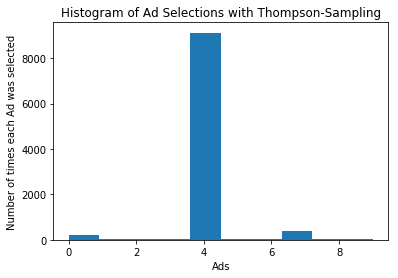

In [19]:
# Look at how many times each ad was selected 
plt.hist(ads_selected)
plt.title("Histogram of Ad Selections with Thompson-Sampling")
plt.xlabel("Ads")
plt.ylabel("Number of times each Ad was selected")
plt.show()

# T-Sampling found that Ad 5 is the best ad to show, much quicker than UCB found that it was best 